### Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load images

In [2]:
image_1 = cv2.imread("Test_image_4.jpeg")
image_2 = cv2.imread("Test_image_2.jpeg")

image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

## <b> Histogram Normalization </b>
Histogram normalization is a technique that is used to enhance fine detail within an image.

It is a technique to distribute the frequencies of the histogram over a wider range than the current range

> _Formula_ = ( ( ___Intensity_ - _minimum___ ) // (___maximum_ - _minimum___) )

In [8]:
# Read image
img_ = cv2.imread("Test_image_2.jpeg")
img = img_.astype(np.float16)
H, W, C = img.shape

# Trans [0, 255]
a, b = 0., 255.

vmin = img.min()
vmax = img.max()

out = img.copy()
out[out < a] = a
out[out > b] = b
out = (b - a) / (vmax - vmin) * (out - vmin) + a
out = out.astype(np.uint8)

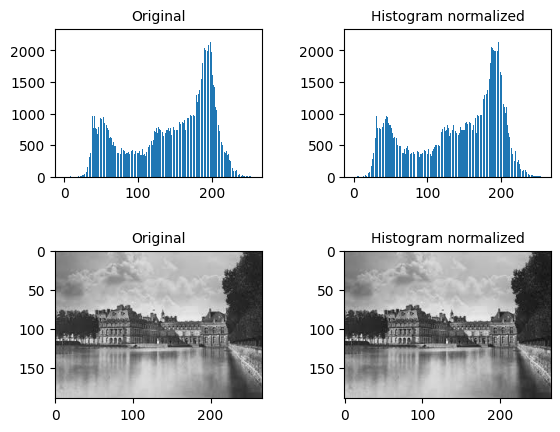

In [9]:
# Display histogram
plt.subplot(221), plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255)), plt.title("Original",fontsize=10)
plt.subplot(222), plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255)), plt.title("Histogram normalized",fontsize=10)   
plt.subplot(223), plt.imshow(img_), plt.title("Original",fontsize=10)
plt.subplot(224), plt.imshow(out), plt.title("Histogram normalized",fontsize=10)   
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()

## <b>Histogram Equalization </b>
Histogram equalization is a method in image processing of contrast adjustment using the image’s histogram.

<i> OR/AND </i>

Histogram equalization is a process where the intensity values of an image are adjusted to create a higher overall contrast.

-> <i> It increases images overall Contrast and Intensity, leading to better appealing image.</i>

### <b>Histogram of Gray Image</b>

In [ ]:
# imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
# cdf = imhist.cumsum() 
# #normalization of the image
# cdf = imhist.max()*cdf/cdf.max() 
# cdf_mask = np.ma.masked_equal(cdf, 0)
# cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
# cdf = np.ma.filled(cdf_mask,0).astype('uint8')
# return cdf[im.astype('uint8')]

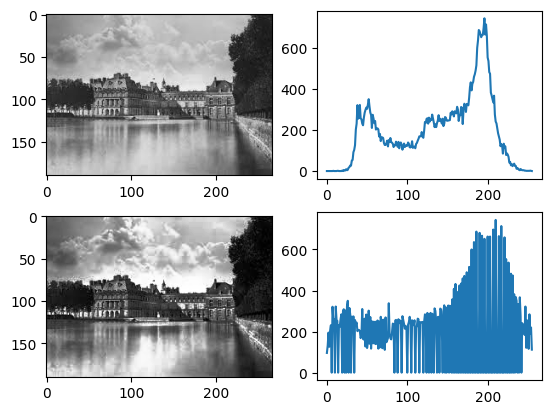

In [26]:
# Calculate histogram of the Gray-channel
hist1 = cv2.calcHist([image_2],[0],None,[256],[0,256])

# Equalize the Gray channel Histogram
img_2 = cv2.equalizeHist(image_2)
# Calculate equalized histogram of the Gray-channel 
hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(image_2,cmap='gray');
plt.subplot(222),plt.plot(hist1);
plt.subplot(223),plt.imshow(img_2,cmap='gray');
plt.subplot(224),plt.plot(hist2);
plt.show()

### <b>Histogram of Color Image</b>

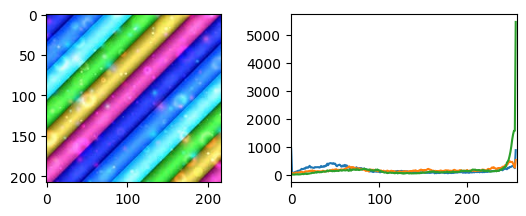

In [13]:
# Calculate histogram of each color channel seperately 
hist1 = cv2.calcHist([image_1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([image_1],[1],None,[256],[0,256])
hist3 = cv2.calcHist([image_1],[2],None,[256],[0,256])

plt.subplot(221), plt.imshow(image_1)
plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
plt.xlim([0,256])

plt.show()

### <b>Histogram Equalization of Color Image</b>

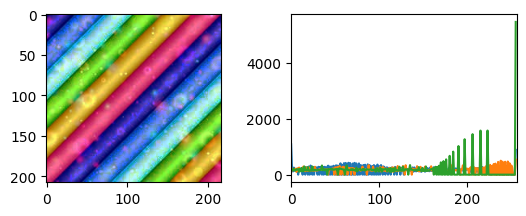

In [16]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    return img_out

Eq_hist_image = histogram_equalization(image_1)
# Calculate histogram of each color channel seperately 
eq_hist1 = cv2.calcHist([Eq_hist_image],[0],None,[256],[0,256])
eq_hist2 = cv2.calcHist([Eq_hist_image],[1],None,[256],[0,256])
eq_hist3 = cv2.calcHist([Eq_hist_image],[2],None,[256],[0,256])

plt.subplot(221), plt.imshow(Eq_hist_image)
plt.subplot(222), plt.plot(eq_hist1), plt.plot(eq_hist2),plt.plot(eq_hist3)
plt.xlim([0,256])
plt.show()